In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [2]:
df = pd.read_csv('csv/features/rolling_window_dataset_separate_counts_60D.csv')
df = df.drop(columns=['date_start', 'date_end', 'high_risk', 'low_risk', 'successful_hack_attack'])
df

,size,dns_recursive_mean,dns_recursive_max,untrusted_tls_mean,untrusted_tls_max,dns_recursive_mean_last14,dns_recursive_max_last14,untrusted_tls_mean_last14,untrusted_tls_max_last14,spam_1,...,shadowserver_scan_tftp_total,shadowserver_scan_ubiquiti_total,shadowserver_scan_vnc_total,shadowserver_scan_xdmcp_total,shadowserver_sinkhole_dns_total,shadowserver_sinkhole_http_drone_total,shadowserver_spam_url_total,shadowserver_special_total,shadowserver_ssl_scan_total,shadowserver_wiki_file_total
0,1024.0,0.0,0.0,0.444444,1.0,0.0,0.0,0.928571,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1024.0,0.0,0.0,0.444444,1.0,0.0,0.0,0.964286,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1024.0,0.0,0.0,0.444444,1.0,0.0,0.0,1.000000,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,1024.0,0.0,0.0,0.436111,1.0,0.0,0.0,0.964286,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,1024.0,0.0,0.0,0.452778,1.0,0.0,0.0,0.964286,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
89854,1024.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
89855,1024.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
89856,1024.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
89857,1024.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [3]:
sparsity_ratios = (df == 0).sum(axis=1).sort_values() / len(df.columns)
import time
for row, val in sparsity_ratios.to_dict().items():
    val = round(val, 3)
    print('{:<6} {:<4}'.format(row, val))
    time.sleep(0.0001)
    
    if val == 0.926:
        print('^^^ etc. ^^^')
        break

15040  0.246
15073  0.246
15034  0.246
15071  0.246
15070  0.246
15069  0.246
15033  0.246
15032  0.246
15042  0.258
15044  0.258
15105  0.258
15104  0.258
15101  0.258
15100  0.258
15080  0.258
15041  0.258
15065  0.258
15066  0.258
15067  0.258
15068  0.258
15081  0.258
15079  0.258
15078  0.258
15077  0.258
15072  0.258
15099  0.258
15098  0.258
15074  0.258
15038  0.258
15158  0.258
15159  0.258
15039  0.258
15160  0.258
15161  0.258
15027  0.258
15029  0.258
15030  0.258
15031  0.258
14955  0.258
15028  0.258
14957  0.258
14958  0.258
15026  0.258
14959  0.258
15035  0.258
15025  0.258
15036  0.258
15037  0.258
15157  0.258
14903  0.267
14908  0.27
14902  0.27
15023  0.27
15017  0.27
15018  0.27
15057  0.27
15020  0.27
15050  0.27
15024  0.27
14912  0.27
14911  0.27
15046  0.27
15045  0.27
15190  0.27
15189  0.27
15064  0.27
15043  0.27
15047  0.27
15076  0.27
15106  0.27
15107  0.27
15116  0.27
15117  0.27
15118  0.27
14961  0.27
14960  0.27
14956  0.27
15152  0.27
15153  0.27
15

In [4]:
len(sparsity_ratios[sparsity_ratios >= 0.8]) / len(sparsity_ratios.index)

0.9486528895269255

<AxesSubplot: >

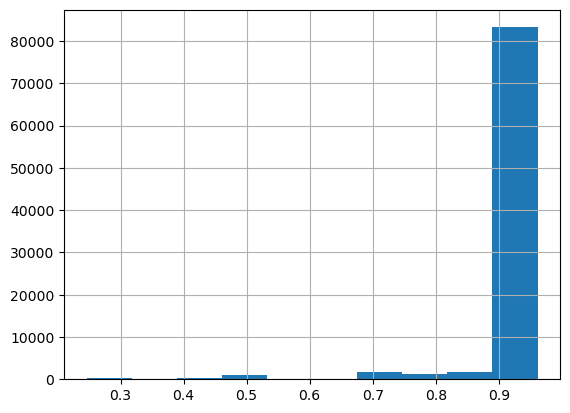

In [5]:
sparsity_ratios.hist()

In [6]:
col_sparsity_ratios = (df == 0).sum().sort_values() / len(df.index)
for feature, val in col_sparsity_ratios.to_dict().items():
    print('{:<45s} {:<10s}'.format(feature, str(val)))

size                                          0.0       
avg_persistence_spam_normal_last14            0.0009347978499649451
freq_spam_normal_last14                       0.0009347978499649451
avg_persistence_phishing_normal_last14        0.0010015691249624411
freq_phishing_normal_last14                   0.0010015691249624411
avg_persistence_phishing_normal               0.0022590948040819504
freq_phishing_normal                          0.0022590948040819504
avg_persistence_spam_normal                   0.002737622274897339
freq_spam_normal                              0.002737622274897339
avg_persistence_misc_normal_last14            0.013988582111975428
freq_misc_normal_last14                       0.013988582111975428
freq_misc_normal                              0.031349113611324406
avg_persistence_misc_normal                   0.031349113611324406
unique_ips                                    0.47899486974037103
number_open_ports                             0.47899486974037103
n

In [7]:
col_sparsity_ratios[col_sparsity_ratios>0.9]

shadowserver_scan_ssl_poodle_total        0.915690
freq_misc_good                            0.938693
avg_persistence_misc_good                 0.938693
normalized_magnitude_misc_bad             0.938838
magnitude_misc_bad                        0.938838
                                            ...   
shadowserver_cisco_smart_install_total    1.000000
shadowserver_cc_ip_total                  1.000000
shadowserver_caida_ip_spoofer_total       1.000000
shadowserver_scan_net_pmp_total           1.000000
shadowserver_wiki_file_total              1.000000
Length: 312, dtype: float64

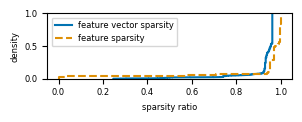

In [10]:
import matplotlib

font = {#'family' : 'serif',
         'size'   : 6,
         }

matplotlib.rc('font', **font)

sns.set_palette("colorblind")

# Create the figure and axes
fig, ax = plt.subplots(figsize=(3,1.2))

# Plot the CDF using seaborn's lineplot
sns.ecdfplot(sparsity_ratios, ax=ax, label='feature vector sparsity')
sns.ecdfplot(col_sparsity_ratios, ax=ax, label='feature sparsity', linestyle='--')


# Set the labels and title
ax.set_xlabel('sparsity ratio')
ax.set_ylabel('density')
ax.legend()

# Show the plot
plt.tight_layout()
plt.show()



# Save the figure
fig.savefig('figures/sparsity.pdf')

In [19]:
for x in df.columns:
    if 'shadowserver' in x:
        print(x[x.index('_')+1:].replace('_total', ''))

blacklist
blocklist
botnet_drone
caida_ip_spoofer
cc_ip
cisco_smart_install
compromised_website
cwsandbox_url
darknet
ddos_amplification
dns_openresolver
drone_brute_force
hp_http_scan
hp_ics_scan
microsoft_sinkhole
netis_router
open_proxy
outdated_dnssec_key
scan_adb
scan_afp
scan_ard
scan_chargen
scan_coap
scan_cwmp
scan_db2
scan_dns
scan_elasticsearch
scan_ftp
scan_hadoop
scan_http
scan_http_vulnerable
scan_ipmi
scan_ipp
scan_isakmp
scan_ldap_tcp
scan_ldap
scan_mdns
scan_memcached
scan_mongodb
scan_mqtt
scan_mssql
scan_nat_pmp
scan_net_pmp
scan_ntp
scan_ntpmonitor
scan_qotd
scan_radmin
scan_rdp
scan_rdpeudp
scan_redis
scan_rsync
scan_smb
scan_snmp
scan_ssdp
scan_ssl_freak
scan_ssl_poodle
scan_telnet
scan_tftp
scan_ubiquiti
scan_vnc
scan_xdmcp
sinkhole_dns
sinkhole_http_drone
spam_url
special
ssl_scan
wiki_file
